# Skills keywords

Objective: identifying skills keywords from job descritions with basic NLP techniques.

In [250]:
import collections
import json
import matplotlib.pyplot as plt
import nltk
import pandas as pd
from wordcloud import WordCloud

from selenium import webdriver
from bs4 import BeautifulSoup
import time
import string
import numpy as np
import seaborn as sns
from tqdm import tqdm

## Data extraction

In [251]:
def url_to_soup(url):
    """"
    Step 1: extract url's html into soup object.
    """
    driver = webdriver.Chrome()
    driver.get(url)

    time.sleep(3)
    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")
    driver.close()
    return soup

# Check.
#url = "https://www.linkedin.com/jobs/search?keywords=Senior%20Data%20Scientist&location=United%20States"
#soup = url_to_soup(url)

In [252]:
def soup_to_jobs(soup):
    """"
    Step 2: get all jobs specific url from the LinkedIn general search.
    """
    descriptions = soup.find_all("a", class_="base-card__full-link absolute top-0 right-0 bottom-0 left-0 p-0 z-[2]")

    list_job_href = [i.get('href') for i in descriptions]
    print(f"Jobs found: {len(list_job_href)}")
    
    return list_job_href

# Check.
#list_job_href = soup_to_jobs(soup)

In [253]:
def jobs_to_description(list_href):
    """
    Step 3: extract raw job description from job posting.
    """
    list_title = []
    list_description = []
    
    for href in list_href:
        soup = url_to_soup(href)
        list_title.append(soup.find('title').string)
        list_description.append(soup.find('div', class_='show-more-less-html__markup show-more-less-html__markup--clamp-after-5').get_text())

    df = pd.DataFrame({'title': list_title, 'href': list_href, 'description':list_description})
    return df

# Check
#df = jobs_to_description(list_job_href[:3])

In [254]:
# Creating single list of LinkedIn job's urls passing specific filters.
df_states = pd.read_html('https://www.jagranjosh.com/general-knowledge/list-of-states-in-usa-1663078166-1', header=0)[0]
df_states['State'] = df_states['State'].str.replace(' ', '%20')


list_url = []
for i in df_states['State']:
    # Name: Senior Data Scientist.
    list_url.append(f'https://www.linkedin.com/jobs/search?keywords=Senior%20Data%20Scientist&location={i}&position=1&pageNum=0')

    # Experience level: mid-senior level.
    list_url.append(f'https://www.linkedin.com/jobs/search?keywords=Senior%20Data%20Scientist&location={i}&f_TPR=&f_E=4&position=1&pageNum=0')

    # Name: Data Scientist III
    list_url.append(f'https://www.linkedin.com/jobs/search?keywords=Data%20Scientist%20III&location={i}&position=1&pageNum=0')

list_url[:5]

['https://www.linkedin.com/jobs/search?keywords=Senior%20Data%20Scientist&location=Alabama&position=1&pageNum=0',
 'https://www.linkedin.com/jobs/search?keywords=Senior%20Data%20Scientist&location=Alabama&f_TPR=&f_E=4&position=1&pageNum=0',
 'https://www.linkedin.com/jobs/search?keywords=Data%20Scientist%20III&location=Alabama&position=1&pageNum=0',
 'https://www.linkedin.com/jobs/search?keywords=Senior%20Data%20Scientist&location=Alaska&position=1&pageNum=0',
 'https://www.linkedin.com/jobs/search?keywords=Senior%20Data%20Scientist&location=Alaska&f_TPR=&f_E=4&position=1&pageNum=0']

In [255]:
def pipeline_extract(list_url):
    """
    Step 1 + 2 + 3: encapsulate all exctraction steps.
    """

    df_output = pd.DataFrame()
    for i in tqdm(list_url):
        try:
            soup = url_to_soup(i)
            list_job_href = soup_to_jobs(soup)
            df = jobs_to_description(list_job_href)
            df_output = pd.concat([df_output, df], axis=0).reset_index(drop=True)
        except:
            print(f"The url {i} did not return jobs.")

    df_output.drop_duplicates(inplace=True)
    return df_output

In [243]:
#df_raw = pipeline_extract(list_url)

In [525]:
df_raw.loc[3, 'href']

'https://www.linkedin.com/jobs/view/data-scientist-at-ignitec-inc-3549564083?refId=Zax6RSoNQCl7RXrdHQkrtQ%3D%3D&trackingId=kuRJ3ThR1RSYhPjGOOE7vA%3D%3D&position=4&pageNum=0&trk=public_jobs_jserp-result_search-card'

In [245]:
# Creating single list of LinkedIn job's urls passing specific filters.
df_states = pd.read_html('https://www.jagranjosh.com/general-knowledge/list-of-states-in-usa-1663078166-1', header=0)[0]
df_states['State'] = df_states['State'].str.replace(' ', '%20')


list_url = []
for i in df_states['State']:
    # Name: Senior Data Scientist.
    list_url.append(f'https://www.linkedin.com/jobs/search?keywords=Senior%20Data%20Scientist&location={i}&position=1&pageNum=0')

    # Experience level: mid-senior level.
    list_url.append(f'https://www.linkedin.com/jobs/search?keywords=Senior%20Data%20Scientist&location={i}&f_TPR=&f_E=4&position=1&pageNum=0')

    # Name: Data Scientist III
    list_url.append(f'https://www.linkedin.com/jobs/search?keywords=Data%20Scientist%20III&location={i}&position=1&pageNum=0')

list_url[:5]

['https://www.linkedin.com/jobs/search?keywords=Senior%20Data%20Scientist&location=Alabama&position=1&pageNum=0',
 'https://www.linkedin.com/jobs/search?keywords=Senior%20Data%20Scientist&location=Alabama&f_TPR=&f_E=4&position=1&pageNum=0',
 'https://www.linkedin.com/jobs/search?keywords=Data%20Scientist%20III&location=Alabama&position=1&pageNum=0',
 'https://www.linkedin.com/jobs/search?keywords=Senior%20Data%20Scientist&location=Alaska&position=1&pageNum=0',
 'https://www.linkedin.com/jobs/search?keywords=Senior%20Data%20Scientist&location=Alaska&f_TPR=&f_E=4&position=1&pageNum=0']

In [246]:
#df_raw.sample(5)
df_raw.to_csv('teste.csv', index=False)
#df_raw = pd.read_csv('dataset.csv')
df_raw

,title,href,description
0,Recruiting from Scratch está contratando Senio...,https://www.linkedin.com/jobs/view/senior-data...,\nWho is Recruiting from Scratch: Recruiting f...
1,Recruiting from Scratch está contratando Senio...,https://www.linkedin.com/jobs/view/senior-data...,\nWho is Recruiting from Scratch: Recruiting f...
2,Intuitive Research and Technology Corporation ...,https://www.linkedin.com/jobs/view/entry-level...,\nINTUITIVE® is a nationally recognized Best P...
3,Ignitec Inc está contratando Data Scientist em...,https://www.linkedin.com/jobs/view/data-scient...,"\nRole: Data Scientist Pay: $110,000-$130,000L..."
4,ISSAC LLC está contratando Data Scientist em: ...,https://www.linkedin.com/jobs/view/data-scient...,\n Category: Engineering Location: Hunt...
...,...,...,...
2331,3.000 vagas de Data Scientist Iii em: Estados ...,https://www.linkedin.com/jobs/data-scientist-i...,"\nTitle: Bioanalytical Scientist, DiscoveryLoc..."
2332,3.000 vagas de Data Scientist Iii em: Estados ...,https://www.linkedin.com/jobs/data-scientist-i...,"\nJOB DESCRIPTIONThe role of the “Chemistry, M..."
2333,3.000 vagas de Data Scientist Iii em: Estados ...,https://www.linkedin.com/jobs/data-scientist-i...,\n 12 Month Contract (Likelihood to ext...
2334,3.000 vagas de Data Scientist Iii em: Estados ...,https://www.linkedin.com/jobs/data-scientist-i...,\nAbout Company: HiFiBiO Therapeutics is an em...


In [247]:
df_raw.loc[0, 'href']
df_raw.loc[1, 'href']

'https://www.linkedin.com/jobs/view/senior-data-scientist-at-recruiting-from-scratch-3437494438?refId=Zax6RSoNQCl7RXrdHQkrtQ%3D%3D&trackingId=ThPAtTHan7ormTmSapg1lw%3D%3D&position=2&pageNum=0&trk=public_jobs_jserp-result_search-card'

## Data preprocessing

In [779]:
import re

In [786]:
a = 'aeihi aefiha dç aç ;;; aeidjiae; !'
#a.replace('a', '1')
a = re.sub(r'!,;!', 'AQUI', a)
b = {}
for i in string.punctuation:
    b.update({i: ' '}) 

b


{'!': ' ',
 '"': ' ',
 '#': ' ',
 '$': ' ',
 '%': ' ',
 '&': ' ',
 "'": ' ',
 '(': ' ',
 ')': ' ',
 '*': ' ',
 '+': ' ',
 ',': ' ',
 '-': ' ',
 '.': ' ',
 '/': ' ',
 ':': ' ',
 ';': ' ',
 '<': ' ',
 '=': ' ',
 '>': ' ',
 '?': ' ',
 '@': ' ',
 '[': ' ',
 '\\': ' ',
 ']': ' ',
 '^': ' ',
 '_': ' ',
 '`': ' ',
 '{': ' ',
 '|': ' ',
 '}': ' ',
 '~': ' '}

In [798]:
def nlp_preprocessing(df):

    # Tokenize description column.
    long_string = df['description'].str.cat(sep=' ')
    tokens = nltk.tokenize.word_tokenize(long_string)

    # Lowercase all tokens.
    tokens = [i.lower() for i in tokens]

    # Remove punctuation.
    tokens = [i for i in tokens if i not in string.punctuation + '’' + '--']

    # Using nltk default stopwords.
    nltk.download('stopwords')
    stopwords = nltk.corpus.stopwords.words('english')
    tokens = [i for i in tokens if not i in stopwords]

    # Stemming
    #ps = nltk.stem.SnowballStemmer(language='english')
    #tokens = [ps.stem(i) for i in tokens]

    # Lemmatization
    nltk.download('wordnet')
    lem = nltk.stem.WordNetLemmatizer()
    tokens = [lem.lemmatize(i) for i in tokens]

    # Apply corrections within dict.
    with open('dict.json', 'r') as f:
        custom_dict = json.load(f)
    
    for i in custom_dict.items():
        if i[0] in long_string:
            long_string = long_string.replace(i[0], i[1])

    # Removing context relevant stopwords.
    list_custom_words = pd.read_csv('advanced_stopwords.csv', header=None, index_col=False).iloc[:, 0].tolist()
    tokens = [i for i in tokens if not i in list_custom_words]

    #wordcloud = WordCloud(width=1500, height=500).generate(' '.join(tokens))
    #plt.figure(figsize=(25,7))
    #plt.imshow(wordcloud)
    return tokens
    

tokens = nlp_preprocessing(df_raw)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kenji\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Kenji\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [797]:
# Checking the frequency of words
freq = collections.Counter(tokens)
df_freq = pd.DataFrame({'token': freq.keys(), 'qtd': freq.values()}).sort_values('qtd', ascending=False)

i = 'nlp'
df_freq.loc[df_freq['token'].str.contains(i)]

,token,qtd
400,nlp,234
21839,emnlp,8
4882,algorithmsnlp,6
13220,nlp.demonstrated,5
18116,corenlpstrong,3
12083,nlp.as,3
31677,sparknlp,1
32597,nlp.proficient,1
32594,nlp.the,1
12674,nlpexperience,1


## Analysis

In [789]:
# Checking the frequency of words
freq = collections.Counter(tokens)

df_freq = pd.DataFrame({'token': freq.keys(), 'qtd': freq.values()}).sort_values('qtd', ascending=False)
df_freq.head(5)


,token,qtd
12,data,18155
164,model,4405
92,year,4236
59,analysis,4014
175,learning,3158


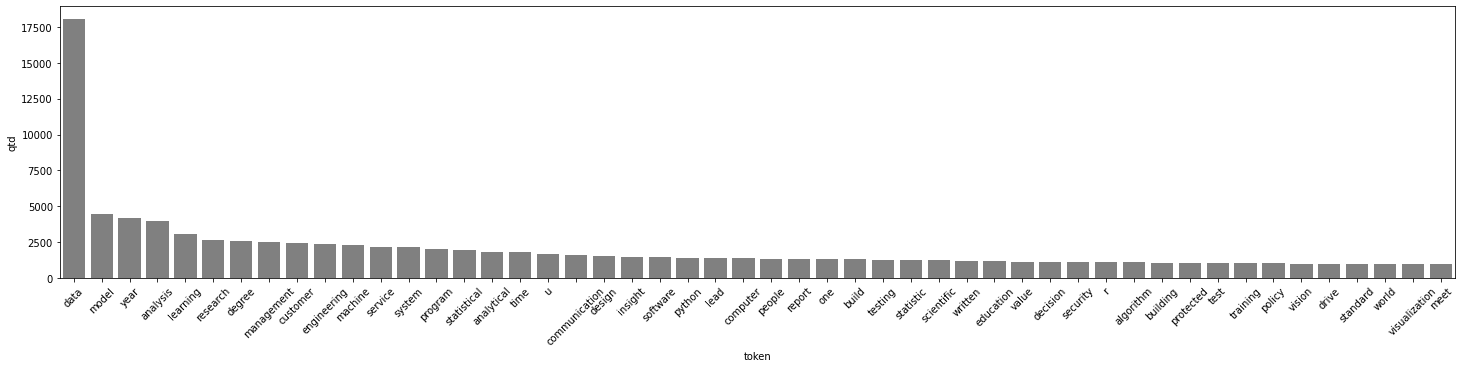

In [754]:
# Plot
plt.figure(figsize=(25, 5))
fig = sns.barplot(data=df_freq.head(50), x='token', y='qtd', color='gray')
fig.tick_params(axis='x', rotation=45)

In [711]:
# Comparing different languages.
list_lang = ['python', 'sql', 'r', 'java', 'c', 'go', 'julia', 'scala', 'javascript', 'swift', 'matlab', 'sas']
# obs: languages obtained from https://www.datacamp.com/blog/top-programming-languages-for-data-scientists-in-2022

df_lang = df_freq.loc[df_freq['token'].isin(list_lang)]
df_lang['perc'] = (df_lang['qtd'] / df_lang['qtd'].sum() * 100).astype(int)

df_lang

C:\Users\Kenji\AppData\Local\Temp\ipykernel_11940\2258299198.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lang['perc'] = (df_lang['qtd'] / df_lang['qtd'].sum() * 100).astype(int)


,token,qtd,perc
201,python,1407,32
606,r,1130,25
101,sql,936,21
394,java,247,5
395,scala,172,3
1401,go,136,3
611,c,133,3
1778,matlab,108,2
607,julia,51,1
609,javascript,45,1


In [774]:
df_raw.loc[df_raw['description'].str.lower().str.contains('nlp knowledge')]

,title,href,description


In [790]:
i = 'nlp'
df_freq.loc[df_freq['token'].str.contains(i)]

,token,qtd
400,nlp,234
21839,emnlp,8
4882,algorithmsnlp,6
13220,nlp.demonstrated,5
18116,corenlpstrong,3
12083,nlp.as,3
31677,sparknlp,1
32597,nlp.proficient,1
32594,nlp.the,1
12674,nlpexperience,1


In [713]:
i = 'storytelling'
df_freq.loc[df_freq['token'] == i]

,token,qtd
5030,storytelling,14


In [714]:
i = 'kera'
df_freq.loc[df_freq['token'] == i]

,token,qtd
2086,kera,75


In [715]:
i = 'pytorch'
df_freq.loc[df_freq['token'] == i]

,token,qtd
420,pytorch,99


Frequency

The frequency returned relevant words, like `data`, `machine` and `degree`. Althouth certainly there are cases like `python` or `r` in which just one word is enough, there are some words that are expected to be linked to other, like `deep learning` or `data visualization`.  

### N-grams

In [716]:
bigrams = list(nltk.ngrams(tokens, 2))
bigrams = [frozenset(i) for i in bigrams]

trigrams = list(nltk.ngrams(tokens, 3))
trigrams = [frozenset(i) for i in trigrams]

# disclaimer: since all job descriptions are merged, there will be n-grams formed of two separate corpus (e.g. last token of first document and first token of second document).

In [717]:
# Organizing the bigram
df_bi = pd.DataFrame({'bigram': bigrams}).value_counts().to_frame().reset_index().rename(columns={0:'qtd'})

list_token1 = []
list_token2 = []
for i in df_bi['bigram']:
    try:
        token1, token2 = i
        list_token1.append(token1)
        list_token2.append(token2)
    except:
        token1 = i
        list_token1.append(token1)
        list_token2.append(token1)
        
df_bi['token1'] = list_token1
df_bi['token2'] = list_token2
df_bi.head(30)

,bigram,qtd,token1,token2
0,"(learning, machine)",2144,learning,machine
1,"(data, analysis)",1002,data,analysis
2,"(degree, bachelor)",716,degree,bachelor
3,"(python, r)",625,python,r
4,"(degree, master)",589,degree,master
5,"(data, visualization)",574,data,visualization
6,"(data, set)",515,data,set
7,"(model, predictive)",489,model,predictive
8,"(learning, deep)",480,learning,deep
9,"(data, source)",466,data,source


In [718]:
def example_job_description(df, string):
    df = df.loc[df['description'].str.contains(string), 'description']
    print(f"Jobs found with '{string}': {df.shape[0]}")
    job = df.iloc[0]
    location = job.find(string)
    interval = 20
    if location > interval:
        output = job[location - interval: location + interval]
    else:
        output = job[0: location + interval]

    return output

In [719]:
i = 'tensor'
example_job_description(df_raw, i)

Jobs found with 'tensor': 30


'mple, scikit learn, tensorflow, torch)Pr'

In [720]:
i = 'scikit'
example_job_description(df_raw, i)

Jobs found with 'scikit': 86


' libraries, such as scikit-learn, pandas'

In [721]:
i = 'Kera'
example_job_description(df_raw, i)

Jobs found with 'Kera': 74


'ensorflow, PyTorch, Keras, etc.), (3) ap'

In [722]:
i = 'torch'
example_job_description(df_raw, i)

Jobs found with 'torch': 53


' learn, tensorflow, torch)Primary Locati'

In [723]:
i = 'NLP'
example_job_description(df_raw, i)

Jobs found with 'NLP': 168


'h to production for NLP tasks:Named Enti'

In [724]:
i = 'Tableau'
example_job_description(df_raw, i)

Jobs found with 'Tableau': 325


'ls such as PowerBI, Tableau, etc.Experie'

In [725]:
i = 'MLOps'
example_job_description(df_raw, i)

Jobs found with 'MLOps': 54


'tions: Knowledge of MLOps pipeline to su'

In [726]:
i = 'governance'
example_job_description(df_raw, i)

Jobs found with 'governance': 127


'miliarity with data governance.Experienc'

In [727]:
df_raw.loc[df_raw['description'].str.contains('pregnancy')].iloc[0, 2]

'\nJob Number: R0167679Data ScientistThe Opportunity: As a data scientist, you’re excited at the prospect of unlocking the secrets held by a data set, and you’re fascinated by the possibilities presented by IoT, machine learning, and artificial intelligence. In an increasingly connected world, massive amounts of structured and unstructured data open new opportunities. As a data scientist at Booz Allen, you can help turn these complex data sets into useful information to solve global challenges. Across private and public sectors from fraud detection to cancer research, to national intelligence, we need you to help find the answers in the data.On our team, you’ll use your analytical skills and data science knowledge to create real-world impact. You’ll work closely with your clients to understand their questions and needs, and then dig into their data-rich environments to find the pieces of their information puzzle. You’ll develop algorithms and systems and use the right combination of to

In [728]:
i = 'long'
df_bi.loc[(df_bi['token1'].str.contains(i)) | (df_bi['token2'].str.contains(i))].head(50)

,bigram,qtd,token1,token2
1732,"(longstanding, 20)",41,longstanding,20
1733,"(longstanding, history)",41,longstanding,history
1848,"(long-term, short-term)",40,long-term,short-term
2176,"(long-term, short-)",34,long-term,short-
4499,"(incentive, long-term)",20,incentive,long-term
4602,"(leave, long-term)",20,leave,long-term
4618,"(foster, belonging)",20,foster,belonging
5587,"(along, way)",17,along,way
5772,"(along, in-person)",16,along,in-person
5773,"(along, time)",16,along,time


In [729]:
perc = np.array(list(range(1, 10, 1)))/10

In [730]:
df_bi.describe(percentiles=perc).T.round(1)

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
qtd,210662.0,3.1,10.3,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,5.0,2144.0


Bigram exploration

The majority of the sample are unique bigrams (percentile 70), with the most frequent bigram appeared 209 times. This result can be perceived as a sign that we may be in the correct path; since our goal is to retrieve the most relevant bigrams, we reduces our burden in at least 70%.

In [731]:
# Organizing the trigram
df_tri = pd.DataFrame({'bigram': trigrams}).value_counts().to_frame().reset_index().rename(columns={0:'qtd'})
df_tri.head(50)

,bigram,qtd
0,"(verbal, written, communication)",366
1,"(learning, model, machine)",283
2,"(data, learning, machine)",240
3,"(python, r, sql)",180
4,"(data, messy, underexplored)",168
5,"(oral, written, communication)",166
6,"(data-driven, insight, producing)",162
7,"(manager, software, placing)",158
8,"(accel, dfj, management)",158
9,"(hardware, manager, software)",158


In [732]:
df_tri.describe(percentiles=perc).T.round(1)

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
qtd,281907.0,2.4,5.1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,4.0,366.0
